In [134]:
#Data_preprocssing and visulazing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrices
from sklearn.metrics import accuracy_score

In [135]:
X=pd.read_csv('/content/titanic_train.csv')
X_test = pd.read_csv('/content/test.csv')

# Data Exploration

In [136]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**here we need to see the catgorical columns with null value and cardnailty less than 10**

In [141]:
cat_cols=[col for col in X.columns
         if X[col].nunique()<10 and
         X[col].dtype=='object' and
         X[col].isnull().sum()>0]
cat_cols

['Embarked']

**here we get the numerical columns with null values**

In [142]:
num_col=[col for col in X.columns
         if X[col].dtype in ['float64','int64'] and
         X[col].isnull().sum()>0]
num_col

['Age']

In [143]:
X['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**since the cardinalitly >10 in Cabin columns then we gonna drop it**

In [144]:
X['Cabin'].nunique()

147

In [145]:
X['Embarked'].nunique()

3

In [146]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [147]:
X['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [148]:
X['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [149]:
X['Fare'].isnull().sum()

0

<Axes: >

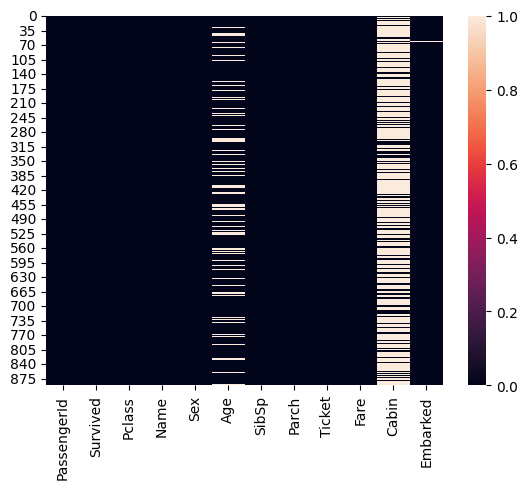

In [150]:
sns.heatmap(X.isnull())

# Data Cleaning

**We gonna drop some useless columns**
- Cabin
- Name
- Ticket
- PassengerId

`` these columns won't give the model any information ``

def clean(X):
    X.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
    missing_num_col=[col for col in X.columns
                    if X[col].isnull().any() and X[col].dtype in ['float64','int64'] ]
    X[missing_num_col] = SimpleImputer(strategy='median').fit_transform(X[missing_num_col])

    return X

In [151]:
clean(X)

# Data Anayltics
- Most of men die
- Most of Pclass = 3 die (its important in our Data)
- Most of ages around 30

1. **we will see the correation between the features to see the important features**

In [152]:
numric_data=X.select_dtypes(exclude='object')
cor=numric_data.corr()

<Axes: >

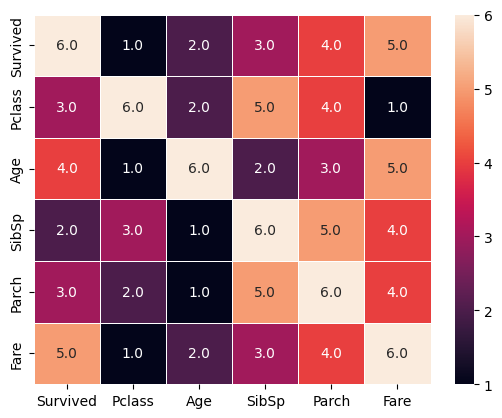

In [153]:
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidth=.5)

<Axes: ylabel='count'>

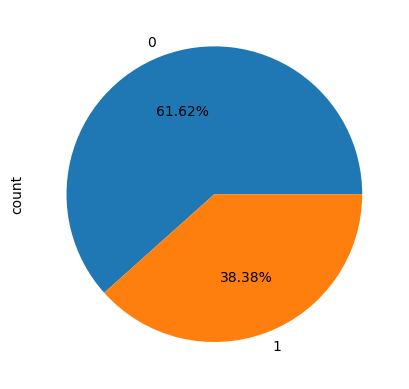

In [154]:
X['Survived'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: ylabel='count'>

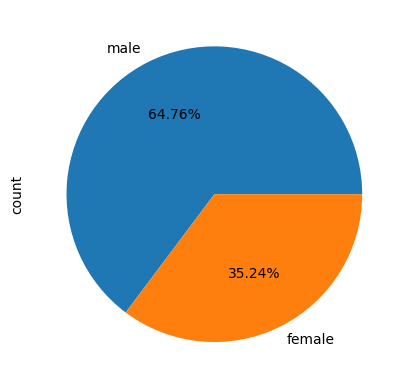

In [155]:
X.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

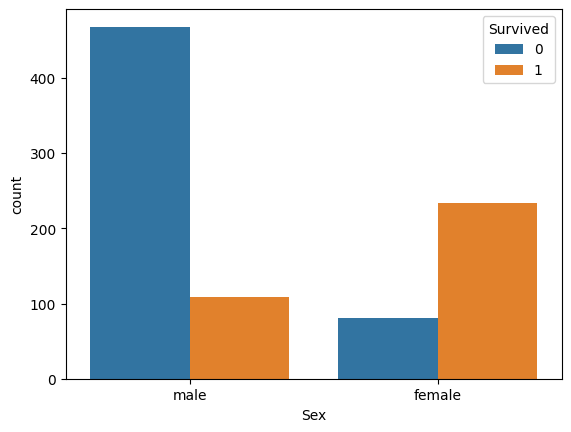

In [156]:
sns.countplot(x='Sex',data=X,hue=X['Survived'])
#

<Axes: xlabel='Pclass', ylabel='count'>

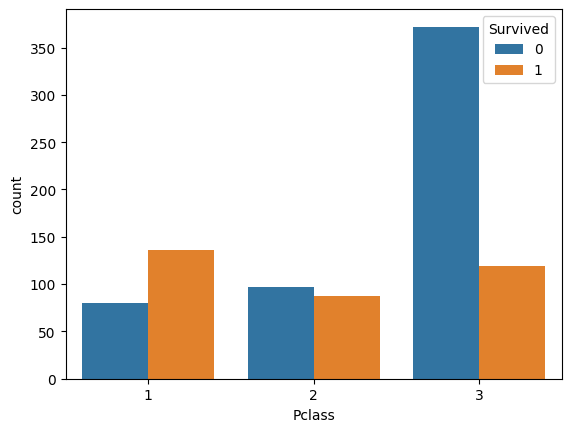

In [157]:
sns.countplot(x='Pclass',data=X,hue=X['Survived'])

<Axes: xlabel='Age', ylabel='Count'>

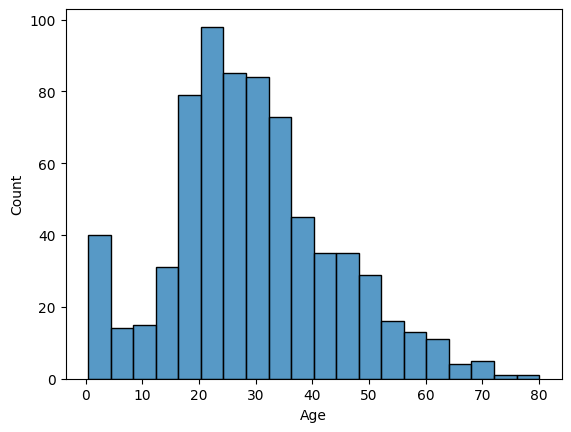

In [158]:
sns.histplot(X['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

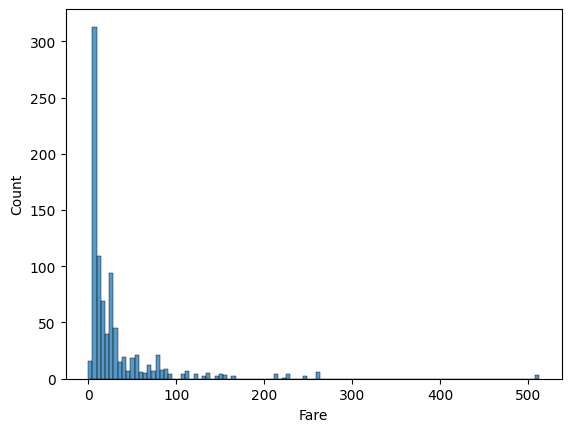

In [159]:
sns.histplot(X['Fare'])

# Transoform the catgorical Data

In [160]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X=pd.get_dummies(X, columns=['Embarked'], drop_first=True)

In [161]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,NaN,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


In [162]:
X.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_Q      0
Embarked_S      0
dtype: int64

# Create Model

In [163]:
y=X.Survived
X.drop(['Survived'],axis=1,inplace=True)

In [164]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [166]:
Models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'SVM':SVC()
}

In [167]:
def get_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy= accuracy_score(pred,y_test)
    return (accuracy)

In [169]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)

In [170]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_valid, y_valid)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


- **We can see that the best model is SVM**

# Creat Neural_network

In [171]:
from keras import layers,models
neural_network=models.Sequential([
    layers.Dense(units=64,activation='relu',input_dim=X_train.shape[1]),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
])
neural_network.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
neural_network.fit(
    X_train,y_train,
    epochs=50,
    validation_data=(X_valid,y_valid),
    batch_size=32
)

Epoch 1/50
23/23 [==============================] - 3s 33ms/step - loss: 0.6253 - accuracy: 0.6826 - val_loss: 0.5764 - val_accuracy: 0.7542
Epoch 2/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5256 - accuracy: 0.8090 - val_loss: 0.5017 - val_accuracy: 0.7654
Epoch 3/50
23/23 [==============================] - 0s 12ms/step - loss: 0.4711 - accuracy: 0.8174 - val_loss: 0.4675 - val_accuracy: 0.7933
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4467 - accuracy: 0.8048 - val_loss: 0.4478 - val_accuracy: 0.7933
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.4342 - accuracy: 0.8104 - val_loss: 0.4371 - val_accuracy: 0.7933
Epoch 6/50
23/23 [==============================] - 0s 16ms/step - loss: 0.4249 - accuracy: 0.8132 - val_loss: 0.4262 - val_accuracy: 0.7933
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 0.4183 - accuracy: 0.8202 - val_loss: 0.4215 - val_accuracy: 0.7877
Epoch 8/50
23/